# Composición de datos estáticos

Estático -> no tiene la dimensión `tiempo` contemplada.

## Datos anteriores

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
ventas["fecha"] = pd.to_datetime(ventas["fecha"], format="%Y-%m-%d")
ventas["horario"] = pd.to_datetime(ventas["horario"], format="%H:%M").dt.time

df = pd.merge(ventas, clientes, on="ID_compra", how="inner")
# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota",
]

# Aplicar el orden de las columnas
df = df[columnas_ordenadas]

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 1. Crear una columna de facturación total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# Asegurarse de que la columna 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Crear columna con el mes como texto completo
df["mes_nombre"] = df["fecha"].dt.strftime("%B")  # e.g., 'January', 'February', etc.

# Crear columna con el número del mes para ordenar correctamente
df["mes_numero"] = df["fecha"].dt.month

# Calcular la facturación mensual
ventas_mensuales = (
    df.groupby(["mes_numero", "mes_nombre"])["facturacion"].sum().reset_index()
)

# Ordenar por número de mes
ventas_mensuales = ventas_mensuales.sort_values("mes_numero")

# Diccionario de traducción de meses
meses = {
    "January": "Ene",
    "February": "Feb",
    "March": "Mar",
    "April": "Abr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Ago",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dic",
}

# Aplicar traducción
ventas_mensuales["mes"] = ventas_mensuales["mes_nombre"].map(meses)

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

# 3. Agrupar por trimestre y método de pago, sumando facturación
ventas_trimestre = (
    df.groupby(["trimestre", "metodo_pago"])["facturacion"].sum().unstack(fill_value=0)
)

# Filtrar solo las 3 categorías deseadas
categorias_interes = ["Papelería y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df["categoria"].isin(categorias_interes)]

# Agrupar por trimestre y categoría, sumando la facturación
ventas_categoria = (
    df_filtrado.groupby(["trimestre", "categoria"])["facturacion"]
    .sum()
    .unstack(fill_value=0)
)

## Pregunta 5: ¿Cuál es la proporción de clientela que participa en el programa de cashback?

#### Prompt

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la proporción de usuarios(as) que están participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

#### Respuesta

Para visualizar la **proporción de usuarios que participan o no en el programa de cashback** a partir de la columna `cashback`, puedes usar un **gráfico circular (pie chart)**, que es ideal para mostrar proporciones.

A continuación te dejo el código en Python usando **Plotly** para interactividad (también incluyo alternativa en Matplotlib si prefieres algo más simple).

---

### ✅ Opción 1: Gráfico interactivo con Plotly

```python
import plotly.express as px

# Contar cuántos clientes participan o no en el programa
cashback_counts = df['cashback'].value_counts().reset_index()
cashback_counts.columns = ['Participa', 'Cantidad']

# Crear gráfico circular
fig = px.pie(
    cashback_counts,
    names='Participa',
    values='Cantidad',
    title='Proporción de participación en el programa de cashback de Zoop',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.show()
```

---

### ✅ Opción 2: Gráfico simple con Matplotlib

```python
import matplotlib.pyplot as plt

# Contar la participación
cashback_counts = df['cashback'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(
    cashback_counts,
    labels=cashback_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#ff7f0e']
)
plt.title('Proporción de participación en el programa de cashback de Zoop')
plt.axis('equal')  # para que el gráfico sea circular
plt.show()
```

---

### 🧠 ¿Qué muestra?

* **Visualmente** cuánto del total de usuarios participa en el programa.
* Puedes ver rápidamente si la mayoría lo usa o no.

¿Te gustaría ver esto en formato de barras en lugar de circular o comparar por región/sexo/edad también? Te puedo ayudar a extenderlo.

In [2]:
import plotly.express as px

# Contar cuántos clientes participan o no en el programa
cashback_counts = df["cashback"].value_counts().reset_index()
cashback_counts.columns = ["Participa", "Cantidad"]

# Crear gráfico circular
fig = px.pie(
    cashback_counts,
    names="Participa",
    values="Cantidad",
    title="Proporción de participación en el programa de cashback de Zoop",
    color_discrete_sequence=px.colors.sequential.RdBu,
)

fig.show()

### Iteración
Se requiere mejorar la paleta de colores.

##### Prompt
Para el gráfico de la opción 1 (gráfico interactivo de Plotly) hay 2 requerimientos adicionales:
1. podrías cambiar la paleta de colores para que el Si (de si participa en el programa de cashback) tenga un color de connotación más positiva y el No sea de connotación negativa?
2. podrías generar una separación o margen entre las 2 representaciones de respuesta (Si y No) del gráfico?

##### Respuesta
Perfecto. Vamos a mejorar el gráfico interactivo con Plotly para que:

1. Use **colores con connotación positiva/negativa**:

   * `"Sí"` → verde (`#2ecc71`)
   * `"No"` → rojo (`#e74c3c`)

2. Tenga una **separación (explosión)** entre las secciones del pastel, usando el parámetro `pull`.

---

### ✅ Código actualizado con ambas mejoras:

```python
import plotly.express as px

# Contar cuántos clientes participan o no en el programa
cashback_counts = df['cashback'].value_counts().reset_index()
cashback_counts.columns = ['Participa', 'Cantidad']

# Crear diccionario de colores personalizados
colores_personalizados = {
    'Sí': '#2ecc71',   # Verde
    'No': '#e74c3c'    # Rojo
}

# Definir explosión para separar las secciones del gráfico
pull_valores = [0.1 if val == 'Sí' else 0.05 for val in cashback_counts['Participa']]

# Crear gráfico circular con colores y separación
fig = px.pie(
    cashback_counts,
    names='Participa',
    values='Cantidad',
    title='Proporción de participación en el programa de cashback de Zoop',
    color='Participa',
    color_discrete_map=colores_personalizados,
    hole=0.3
)

# Aplicar la separación (pull)
fig.update_traces(pull=pull_valores)

# Mostrar gráfico interactivo
fig.show()
```

---

### ✅ Resultado:

* **"Sí"** aparece en **verde**, separado con mayor margen (0.1).
* **"No"** aparece en **rojo**, también con una separación menor (0.05).
* El gráfico es más claro y semántico, ideal para presentaciones o análisis ejecutivos.

¿Quieres agregar un hover personalizado o exportarlo como imagen interactiva/HTML? También se puede.

In [5]:
import plotly.express as px

# Contar cuántos clientes participan o no en el programa
cashback_counts = df["cashback"].value_counts().reset_index()
cashback_counts.columns = ["Participa", "Cantidad"]

# Crear diccionario de colores personalizados
colores_personalizados = {"Sí": "#2ecc71", "No": "#e74c3c"}  # Verde  # Rojo

# Definir explosión para separar las secciones del gráfico
pull_valores = [0.1 if val == "Sí" else 0.05 for val in cashback_counts["Participa"]]

# Crear gráfico circular con colores y separación
fig = px.pie(
    cashback_counts,
    names="Participa",
    values="Cantidad",
    title="Proporción de participación en el programa de cashback de Zoop",
    color="Participa",
    color_discrete_map=colores_personalizados,
    # hole=0.3,
)

# Aplicar la separación (pull)
fig.update_traces(pull=pull_valores)

# Mostrar gráfico interactivo
fig.show()

> 💡 Gráfico de Pie es una buena opción para cuando hay pocas categorías o mejor aún cuando los datos son **dicotómicos**.

# Distribución de datos

## Pregunta 6: ¿Cómo están distribuidas las calificaciones de la compra? ¿Tenemos buenos números en general?

#### Prompt

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la distribución de las evaluaciones del público en relación con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relación con la compra que realizaron, que varían de 0 a 10 en números enteros.

Deseamos crear una visualización que muestre la distribución de estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear este gráfico.

#### Respuesta

Para mostrar la **distribución de las evaluaciones del público** (columna `nota`, de 0 a 10), una visualización adecuada sería un **histograma** o un **gráfico de barras** que muestre la frecuencia de cada calificación.

A continuación te muestro ambas opciones usando **Plotly** para interactividad y **Seaborn** como alternativa estática.

---

### ✅ Opción 1: Gráfico interactivo con Plotly

```python
import plotly.express as px

# Crear histograma con Plotly
fig = px.histogram(
    df,
    x='nota',
    nbins=11,  # de 0 a 10, enteros
    title='Distribución de las calificaciones del público',
    labels={'nota': 'Calificación', 'count': 'Cantidad'},
    color_discrete_sequence=['#3498db']
)

fig.update_layout(bargap=0.2)  # separación entre barras
fig.show()
```

---

### ✅ Opción 2: Gráfico de barras con Seaborn

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar estilo
sns.set(style="whitegrid")

# Crear gráfico de conteo
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='nota', palette='Blues')

plt.title('Distribución de las calificaciones del público')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.xticks(range(0, 11))  # Asegura que salgan del 0 al 10
plt.show()
```

---

### 🧠 ¿Qué muestra este gráfico?

* Qué calificaciones son más comunes.
* Si los clientes suelen evaluar bien o mal.
* Posibles problemas si hay muchas notas bajas (0–3).

¿Quieres dividir esta distribución por método de pago, edad o región? También se puede hacer para profundizar más.

In [11]:
import plotly.express as px

# Crear histograma con Plotly
fig = px.histogram(
    df,
    x="nota",
    nbins=11,  # de 0 a 10, enteros
    title="Distribución de las calificaciones del público",
    labels={"nota": "Calificación", "count": "Cantidad"},
    color_discrete_sequence=["#3498db"],
)

fig.update_layout(bargap=0.2)  # separación entre barras
fig.show()

> 👍 Histograma es el mejor gráfico para representar Distribuciones

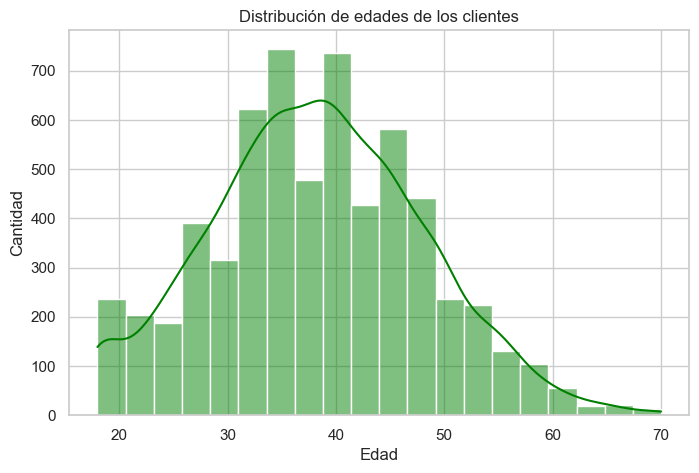

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df, x="edad", bins=20, kde=True, color="green"
)  # kde agrega línea de densidad

plt.title("Distribución de edades de los clientes")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

# Otros gráficos de distribución

## Pregunta 7: ¿Cómo está distribuida nuestra audiencia por edad y sexo biológico? ¿Existe algún grupo que sobresalga?

#### Prompt

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la distribución de nuestra audiencia por edad y sexo biológico.

En "df", tenemos las columnas:

- edad: edad de la persona que realizó la compra
- sexo_biologico: sexo biológico de la persona que realizó la compra, con datos categóricos
Deseamos crear una visualización que muestre la distribución de estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

#### Respuesta

Una excelente forma de visualizar la **distribución conjunta de edad y sexo biológico** es mediante un **histograma segmentado** (gráfico de distribución por grupos) o un **gráfico de densidad**. A continuación, te muestro dos opciones para esto:

---

## ✅ Opción 1: **Histograma segmentado** con `seaborn`

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='edad', hue='sexo_biologico', bins=20, kde=False, multiple='stack')

plt.title('Distribución de la audiencia por edad y sexo biológico')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(title='Sexo biológico')
plt.tight_layout()
plt.show()
```

* `multiple='stack'` apila las barras para ver proporciones por grupo.
* También puedes usar `multiple='dodge'` para verlas **lado a lado**.

---

## ✅ Opción 2: **Gráfico de densidad** con `seaborn`

```python
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='edad', hue='sexo_biologico', fill=True, common_norm=False, alpha=0.5)

plt.title('Distribución de la audiencia por edad y sexo biológico')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend(title='Sexo biológico')
plt.tight_layout()
plt.show()
```

Este gráfico permite ver **tendencias y formas de la distribución** de edades para cada grupo.

---

## ✅ Opción 3: (Bonus) Interactivo con **Plotly**

```python
import plotly.express as px

fig = px.histogram(
    df, 
    x='edad', 
    color='sexo_biologico',
    barmode='overlay',  # también puedes usar 'group' o 'stack'
    nbins=20,
    title='Distribución de la audiencia por edad y sexo biológico',
    labels={'edad': 'Edad', 'count': 'Cantidad'},
    opacity=0.6,
    color_discrete_sequence=['#3498db', '#e74c3c']
)

fig.update_layout(bargap=0.1)
fig.show()
```

---

¿Quieres que el gráfico se enfoque en un rango específico de edades (por ejemplo, menores de 60)? También puedo incluirlo si lo deseas.

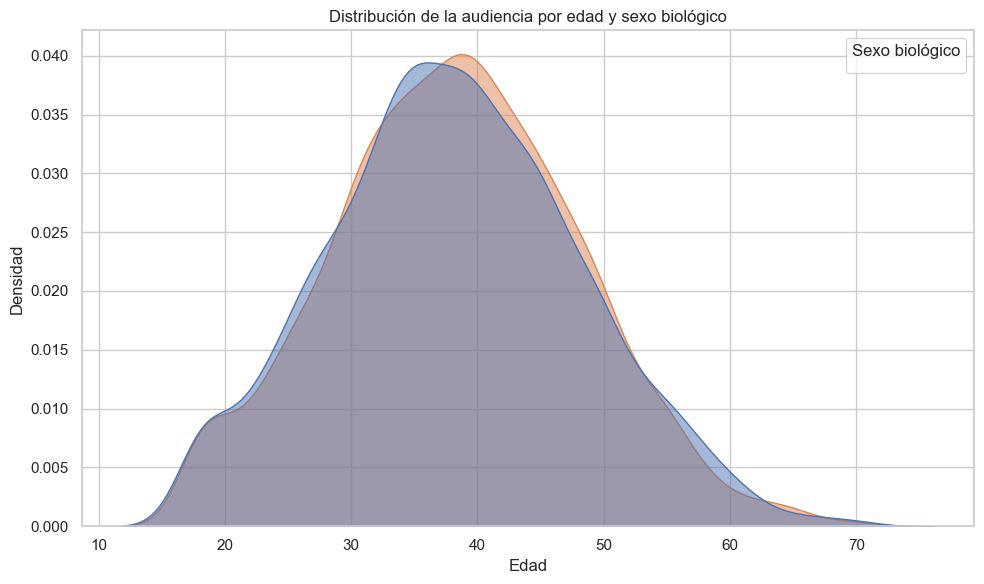

In [13]:
# Gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, x="edad", hue="sexo_biologico", fill=True, common_norm=False, alpha=0.5
)

plt.title("Distribución de la audiencia por edad y sexo biológico")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend(title="Sexo biológico")
plt.tight_layout()
plt.show()

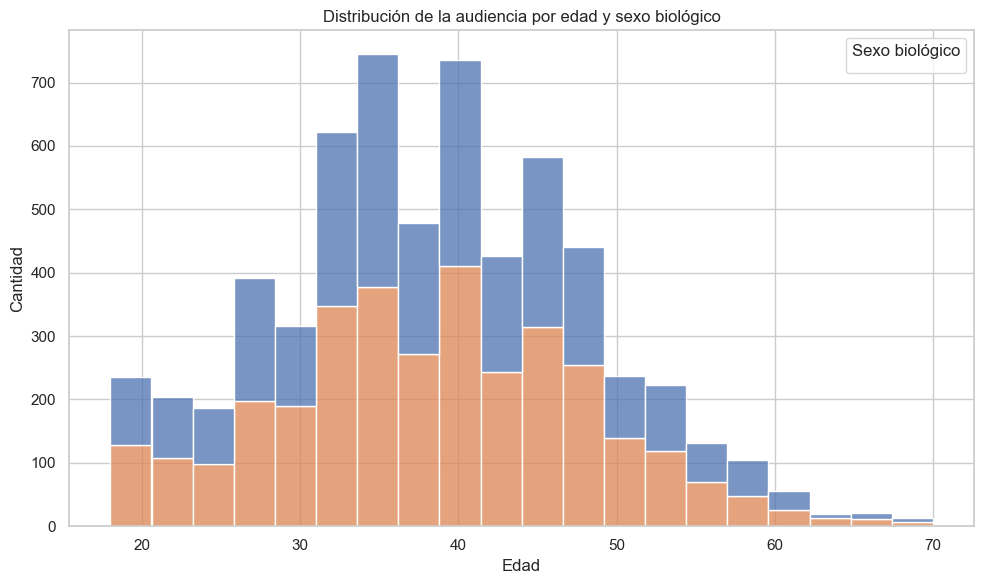

In [14]:
# Histograma segmentado
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, x="edad", hue="sexo_biologico", bins=20, kde=False, multiple="stack"
)

plt.title("Distribución de la audiencia por edad y sexo biológico")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.legend(title="Sexo biológico")
plt.tight_layout()
plt.show()

In [15]:
import plotly.express as px

fig = px.histogram(
    df,
    x="edad",
    color="sexo_biologico",
    barmode="overlay",  # también puedes usar 'group' o 'stack'
    nbins=20,
    title="Distribución de la audiencia por edad y sexo biológico",
    labels={"edad": "Edad", "count": "Cantidad"},
    opacity=0.6,
    color_discrete_sequence=["#3498db", "#e74c3c"],
)

fig.update_layout(bargap=0.1)
fig.show()

<Figure size 1000x600 with 0 Axes>

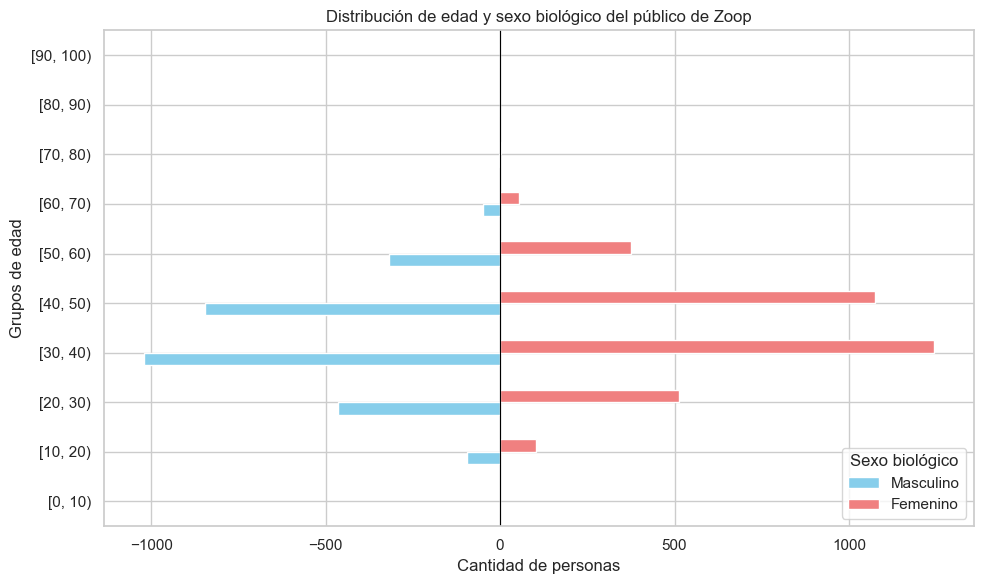

In [ ]:
# Pirámide poblacional (gráfico de barras horizontales divergentes)

# 1. Crear grupos de edad
df["grupo_edad"] = pd.cut(df["edad"], bins=range(0, 101, 10), right=False)

# 2. Agrupar por sexo biológico y grupo de edad
piramide = df.groupby(["grupo_edad", "sexo_biologico"]).size().unstack(fill_value=0)

# 3. Invertir un grupo para graficar hacia la izquierda
piramide["Masculino"] = -piramide.get("Masculino", 0)  # si 'Masculino' no existe, usa 0

# 4. Graficar
plt.figure(figsize=(10, 6))
piramide[["Masculino", "Femenino"]].plot(
    kind="barh", stacked=False, color=["skyblue", "lightcoral"], figsize=(10, 6)
)

plt.title("Distribución de edad y sexo biológico del público de Zoop")
plt.xlabel("Cantidad de personas")
plt.ylabel("Grupos de edad")
plt.axvline(0, color="black", linewidth=0.8)
plt.legend(title="Sexo biológico", loc="lower right")
plt.tight_layout()
plt.show()

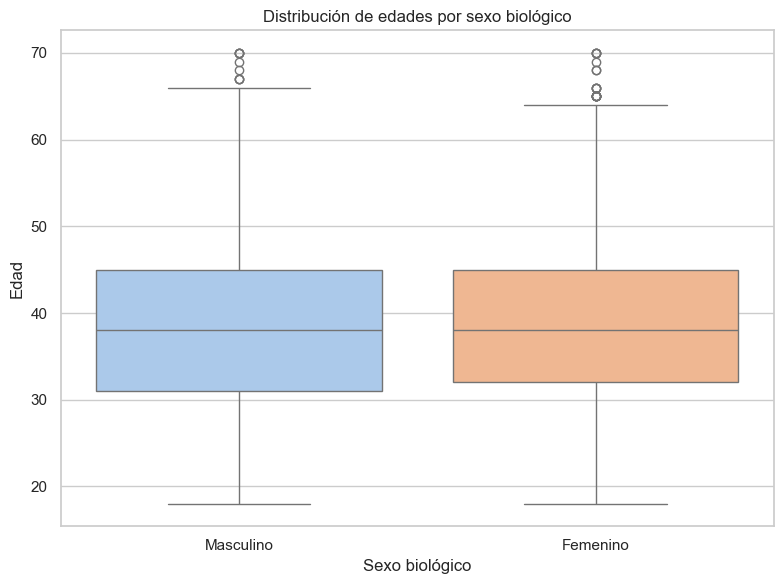

In [18]:
# Boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="sexo_biologico", y="edad", palette="pastel")

plt.title("Distribución de edades por sexo biológico")
plt.xlabel("Sexo biológico")
plt.ylabel("Edad")
plt.tight_layout()
plt.show()